Student Name: Abhijit Sinha
Student ID: 18195067

## Task

###### Making use of Numpy, write a Python class to apply the PCA transform to the provided (see Notebook) data set. Compare the output of your implementation to the PCA functionality provided by the Scikitlearn module.

- Create a 'fit' method that calculates the eigen vectors and eigen values of your dataset. Compare your results to the output of Scikitlearn's fit method and document your findings as a comment (use markdown) directly under the cell with your PCA class.
- Use the Scikitlean's PCA class with n_components=2 and n_components=1 and observe the differences. In the cell directly below, comment on what you have observed.
- Add a property to your class and initialise this property in a suitable fashion to allow you to choose the number of principal components similar to the Scikitlearn PCA class.
- Store those results from your fit method that are required to transform the data set, in suitable class properties.
- Create a 'transform' method to perform the PCA data transformation on your data set using the parameters obtained using your 'fit' method.

###### N.B.:

- Limit your code to the aspects explicitly listed. 
- Use the Jupyter Notebook provided in the repository for week 5. This notebook contains the data that needs to be transformed.
- The required modules have already been imported for you. You should not import any other modules.
- If you find creating a class with this functionality daunting, please start by creating normal functions in your notebook. If time permits, you can then change to use of a class later.

### Reflection:

##### Added the following as reflection:
- Thanks to Brian Parle, Cormac Lavery, Cathal Cronin for their insights in forums and post and helping me identify some potential bugs. Exact details are referred in the code comments

- Added some graphs to visualize the data and transforms

- For the case where n_components = 1, compared the resulting dataset of your transform method with the resulting dataset from Scikitlearn’s transform method by plotting the points on an XY plot. 
    - Explained the differences as comments directly under the cell with the plot.

- For the case where n_components = 1, compared the dataset resulting from your transform method with the original dataset by plotting the points on an XY plot. 
    - Commented on the differences between original and transformed data in the cell directly below the plot. 
    - Explained why and how PCA can be used for dimensionality reduction in the comment

In [1]:
%matplotlib inline
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [2]:
a_x = 0.05
a_y= 10

In [3]:
data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

In [4]:
data.shape

(20, 2)

### Created a class to find PCA using numpy
- Making use of Numpy, created a Python class to apply the PCA transform to the provided data set. 

Following the steps from the links below: 
    - http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf 
    - https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
    - http://sebastianraschka.com/Articles/2014_pca_step_by_step.html
    - https://www.youtube.com/watch?v=FgakZw6K1QQ
    
    
- Step 1: Get some data
- Step 2: Subtract the mean
- Step 3: Calculate the covariance matrix
- Step 4: Calculate the eigenvectors and eigenvalues of the covariance matrix
- Step 5: Choosing components and forming a feature vector
- Step 6: Deriving the new data set

In [5]:
class New_PCA:
    """Principal component analysis (PCA)
     
    Linear dimensionality reduction of the data to project it to a lower dimensional space.
    """
    
    def __init__(self,n_components=None):
        self.n_components = n_components
        self.components_ = []
        
    def fit(self, data):
        """Fit the model with provided data."""
        
        # Step 1: Get the data
        self.data = data   
        
        # Step 2: Get mean of data and center around zero mean
        self.mean_data = self.data.mean(axis=0)
        
        # Center data
        self.data_with_zero_mean = self.data - self.mean_data

        # Step 3: Calculate the covariance matrix of the Centered Data
        self.covariance_matrix = np.cov(self.data_with_zero_mean, rowvar=False)
        
        # Step 4: Calculate the eigenvectors and eigenvalues of the covariance matrix
        eigen_vals, eigen_vecs = eig(self.covariance_matrix)    
        
        # Sort the eigen values and eigen vectors
        # Squaring the values before sorting to remove the sign impact, Thanks to Cormac and Cathcal
        # (absolute each value so that magnitude and not sign is taken into account when ordering)
        sort_index = np.abs(eigen_vals).argsort()[::-1]
        sorted_eig_vals = eigen_vals[sort_index]
        sorted_eig_vecs = eigen_vecs[:, sort_index]
        
        # n_components will filter the eigen vectors
        self.eigen_values= sorted_eig_vals[:self.n_components]
        self.eigen_vectors = sorted_eig_vecs[:, :self.n_components]         
        self.components_ = self.eigen_vectors
        
        return self.eigen_values, self.eigen_vectors
    
    def transform(self, data):
        """Transform the data by calculating the projection.""" 
        
        # Step 5: Choosing components and forming a feature vector and applying Projection
        # Thanks to Brian Parle to highlighting I was not using the data passed as function argument
        data = data - self.mean_data
        self.projected_data = data.dot(self.eigen_vectors)
        return self.projected_data
    
    def inverse_transform(self, transform_data):
        """Inverse transform method to return the reconstructed data."""

        return np.dot(transform_data, self.eigen_vectors.T) + self.mean_data

### Test  and Compare the Implemented and Scikit PCA code for n_components = 2

Implemented PCA eigen values: 
[6.2480561e+02 5.7810582e-01]
Scikit PCA eigen values: 
[6.2480561e+02 5.7810582e-01]

Implemented PCA eigen vectors: 
[[-0.23413525 -0.97220403]
 [-0.97220403  0.23413525]]
Scikit PCA eigen vectors: 
[[ 0.23413525  0.97220403]
 [ 0.97220403 -0.23413525]]

Ratio of variance for Prinicpal components: 
[9.99075598e-01 9.24401780e-04]


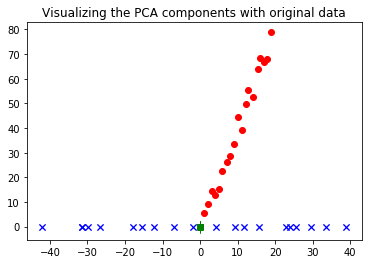

In [6]:
# *************************************************************
# Run the Implemented PCA
# *************************************************************
derived_pca = New_PCA(n_components=2)
derived_pca.fit(data)
derived_transform_data_2 = derived_pca.transform(data)

# Store the PCA values:
derived_pca_eigen_vectors = derived_pca.components_
derived_pca_eigen_values = derived_pca.eigen_values


# *************************************************************
# Run the Scikit learn PCA
# *************************************************************
scikit_pca = PCA(n_components=2)
scikit_pca.fit(data)
scikit_pca.transform(data)

# Store the scikit PCA values:
scikit_pca_eigen_vectors = scikit_pca.components_
scikit_pca_eigen_values = scikit_pca.explained_variance_

# *****************************************************************
# Print the values of Implemented vs Scikitlearn PCA implementation
# *****************************************************************
print("Implemented PCA eigen values: \n{}".format(derived_pca_eigen_values))
print("Scikit PCA eigen values: \n{}".format(scikit_pca_eigen_values))
print()

print("Implemented PCA eigen vectors: \n{}".format(derived_pca_eigen_vectors))
print("Scikit PCA eigen vectors: \n{}".format(scikit_pca_eigen_vectors))
print()

# How much the Ratio of variance is attributed to each principal component
print("Ratio of variance for Prinicpal components: \n{}".format(scikit_pca.explained_variance_ratio_))

# Visualizing the implemneted PCA components w.r.t. original data
plt.title("Visualizing the PCA components with original data")
plt.plot(data[:,0], data[:,1], 'ro')
plt.plot(derived_transform_data_2[:,0], np.zeros_like(derived_transform_data_2), 'bx')
plt.plot(np.zeros_like(derived_transform_data_2), derived_transform_data_2[:,1], 'g+')
plt.show()

###  Compare your results to the output of Scikitlearn's fit method and document your findings as a comment (use markdown) directly under the cell with your PCA class.


#### Observations of Comparison of result:
- The Eigen Values of the Implemented PCA class match up exactly
- The Eigen Vectors, a 2x2 matrix, of Implemented PCA class values are same in magnitude but doesn't match up polarity wise
- The sign of Eigen vectors are not matching, but since the Eigen vector is a straight line we are more interested if our feature falls in that line, the polarity/direction is not important here.
- Almost 99.9% of the data can be represented by using the 1st principal component, which has the highest eigen value and hence the the highest variance of the data
- The graph gives a good visualization on how most of the data can be represented by PC1(blue) which has the most variance, where the PC2(green) is almost zero with less information. Since the PCA components are orthogonal to each other, I have rotated the graphs for visualization

### Use the Scikitlean's PCA class with n_components=2 and n_components=1 and observe the differences.
##### - The below code block will run for n=2 and n=1 for Scikitlearn PCA
#####  - Plots the transformed data and compare it with original data

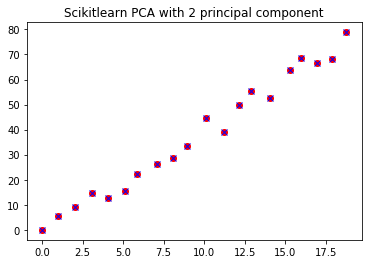

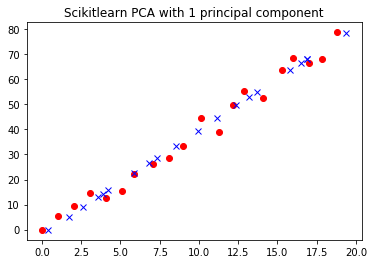

In [7]:
for n in (2,1):
    scikit_pca = PCA(n_components=n)
    scikit_pca.fit(data)
    scikit_transform_data = scikit_pca.transform(data)
    scikit_pca_result = scikit_pca.inverse_transform(scikit_transform_data)
  
    plt.title("Scikitlearn PCA with {} principal component".format(n))
    
    # Plot the original data
    plt.plot(data[:,0], data[:,1], 'ro')
    
    # Plot the rescontructed data after appying scikitlearn PCA tranform
    plt.plot(scikit_pca_result[:,0], scikit_pca_result[:,1], 'bx')
    plt.show()


### Observation when n_component =2:
- The reconstructed data with 2 principal components exactly matches the original data.

### Observation when n_component =1:
- The reconstructed data with one principal component doesn't exactly match the original data, but its very similar to the original data.
- This indicates that we can be use one principal component to represent the original data.

### Test the PCA code for n_components = 1

In [8]:
# *************************************************************
# Run the Implemented PCA for n=1
# *************************************************************
derived_pca = New_PCA(n_components=1)
derived_pca.fit(data)
# Store the projceted data for reconstructing the data
derived_transform_data_1 = derived_pca.transform(data)
# Store the eigen vectors for reconstructing the data
derived_pca_eigen_vector_1 = derived_pca.components_


# *************************************************************
# Run the Scikit learn PCA for n=1
# *************************************************************
scikit_pca = PCA(n_components=1)
scikit_pca.fit(data)
scikit_pca.transform(data)
scikit_transform_data_1 = scikit_pca.transform(data)

### Compare the resulting dataset of your transform method with the resulting dataset from Scikitlearn’s transform method by plotting the points on an XY plot for n_components = 1

Scikitlearn PCA tranform result: 
[[-39.00903672]
 [-33.5347347 ]
 [-29.49067506]
 [-24.07677326]
 [-25.59188937]
 [-22.79036039]
 [-15.80413234]
 [-11.67126273]
 [ -9.32048214]
 [ -4.32597731]
 [  6.82051164]
 [  1.75173786]
 [ 12.1459749 ]
 [ 17.80773029]
 [ 15.55059726]
 [ 26.75944089]
 [ 31.41803081]
 [ 29.80590786]
 [ 31.44322612]
 [ 42.11216638]]

Implemented PCA tranform result: 
[[ 39.00903672]
 [ 33.5347347 ]
 [ 29.49067506]
 [ 24.07677326]
 [ 25.59188937]
 [ 22.79036039]
 [ 15.80413234]
 [ 11.67126273]
 [  9.32048214]
 [  4.32597731]
 [ -6.82051164]
 [ -1.75173786]
 [-12.1459749 ]
 [-17.80773029]
 [-15.55059726]
 [-26.75944089]
 [-31.41803081]
 [-29.80590786]
 [-31.44322612]
 [-42.11216638]]


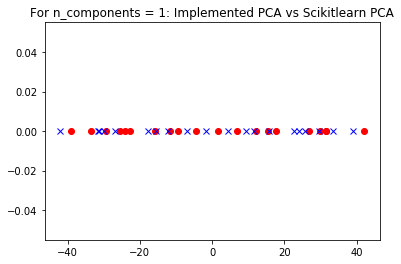

In [9]:
# Compare the resulting dataset of your transform method with the resulting dataset from Scikitlearn’s transform

print("Scikitlearn PCA tranform result: ")
print(scikit_transform_data_1)

print("")

print("Implemented PCA tranform result: ")
print(derived_transform_data_1)

# Plotting the graphs
plt.title("For n_components = 1: Implemented PCA vs Scikitlearn PCA")
# The prncipal components are rotated to be horizontal for visualization
plt.plot(scikit_transform_data_1[:,0], np.zeros_like(scikit_transform_data_1), 'ro')
plt.plot(derived_transform_data_1[:,0], np.zeros_like(derived_transform_data_1), 'bx')
plt.show()

##### If there are any differences, explain these in a comment directly under the cell with your plot.
- The sign of the transformed data using implemented PCA code is not matching the Scikitlearn PCA transform results with n_componenets=1
- The magnitude of the transformed values of both the PCA methods are matching

### Compare the dataset resulting from your transform method with the original dataset by plotting the points on an XY plot for n_components = 1
 

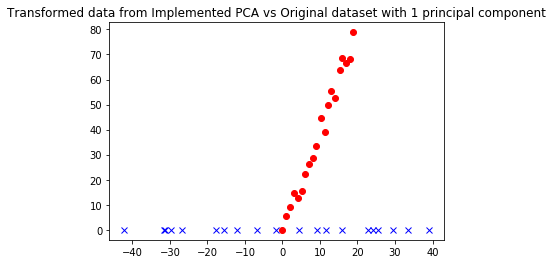

In [10]:
# Compare the dataset resulting from Implemented PCA transform method with the original dataset

plt.title("Transformed data from Implemented PCA vs Original dataset with 1 principal component")
plt.plot(data[:,0], data[:,1], 'ro')
plt.plot(derived_transform_data_1, np.zeros(len(derived_transform_data_1)), 'bx')
plt.show()

### Reconstruct the data on Implemented PCA for n_components=1
- I will be using the implemented inverse_tranform() method for this
- The projected data is of 20x1 and pca is of 2x1, so we need to transform the principal component (changes it to 1x2) to and perform the dot product with the projected data.
- The mean needs to be added to reconstruct the data.

In [11]:
# Reconstruct the data on Implemented PCA with n_componenets=1
reconstructed_data_1 = derived_pca.inverse_transform(derived_transform_data_1)

print("Transformed data shape", derived_transform_data_1.shape)
print("Reduced data shape", reconstructed_data_1.shape)

Transformed data shape (20, 1)
Reduced data shape (20, 2)


### Compare the dataset resulting from your Reconstructed/Reduced data using Implemented PCA method with the original dataset by plotting the points on an XY plot for n_components = 1

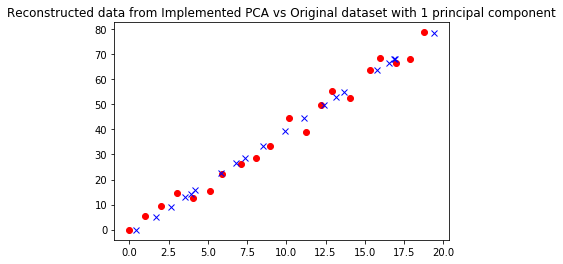

In [12]:
# Compare the dataset resulting from Implemented PCA transform method with the original dataset

plt.title("Reconstructed data from Implemented PCA vs Original dataset with 1 principal component")
plt.plot(data[:,0], data[:,1], 'ro')
plt.plot(reconstructed_data_1[:,0], reconstructed_data_1[:,1], 'bx')
plt.show()

##### Comment on the differences between original and transformed data
The transformed data set with one principal component doesn't exactly match the original dataset. However, the reconstructed data is very close to the original dataset and this shows that, even with one dimension (which is the principal component) we can represent the original dataset.

##### Why and How PCA can be used for dimensionality reduction ?
- PCA performs a linear transformation moving the original set of features to a new space composed by principal component.
- The eigenvector with the highest eigenvalue is the principle component of the data set.
- The original data has 2 dimensions, and we can see that after we calculate the eigenvectors and eigenvalues, and choose only the first eigenvectors (which has the highest variance), we get the final data set which has only 1 dimension and the reconstruction gives us approximately the same information as the original data.
- In machine learning problems with high dimension input data (or where we have more labels/features as compared to the samples), we can use PCA to reduce the number of features. This can improve the model's performance as we will only be using the relevant features with high variance and it will also significantly reduce the training time of the model.